In [8]:
import pandas as pd

try:
    data = pd.read_csv('car_data.csv')
    print("--- SUCCESS! ---")
    print("Your file's column names are:")
    print(list(data.columns))
except FileNotFoundError:
    print(f"Error: 'car_data.csv' not found.")
    print("Please make sure the file is in the same folder as your script.")
except Exception as e:
    print(f"An error occurred: {e}")

--- SUCCESS! ---
Your file's column names are:
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']


--- 1. Data Loading ---
First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
------------------------------

--- 2. Data Preprocessing ---
Features selected: ['Driven_kms', 'car_age', 'Fuel_Type', 'Selling_type', 'Transmission', 'brand']
Target selected: Selling_Price
------------------------------

--- 3. Data Splitting ---
Training data shape: (240, 6)
Testing data

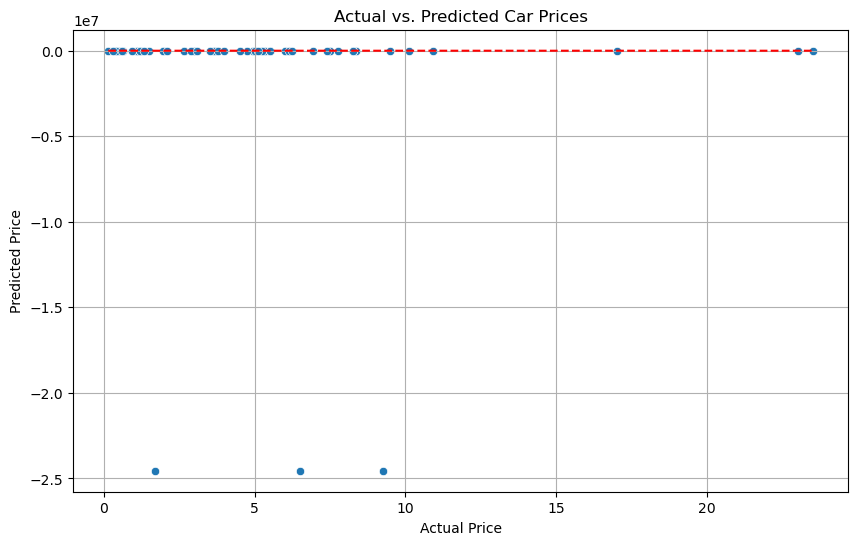

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import datetime

def run_car_price_prediction(data_path='car_data.csv'):
    """
    Performs the complete Car Price Prediction task
    with the corrected column names for your file.
    """
    
    # --- 1. Load the Dataset ---
    print("--- 1. Data Loading ---")
    try:
        data = pd.read_csv(data_path)
    except FileNotFoundError:
        print(f"Error: '{data_path}' not found.")
        return

    print("First 5 rows of the dataset:")
    print(data.head())
    print("-" * 30)

    # --- 2. Data Preprocessing and Feature Engineering ---
    print("\n--- 2. Data Preprocessing ---")
    
    # === CORRECTED COLUMN NAMES ===
    # These now match your file's output
    
    col_car_name =      'Car_Name'      # (1)
    col_year =          'Year'          # (2)
    col_selling_price = 'Selling_Price' # (3)
    col_kms_driven =    'Driven_kms'    # (4) <-- CORRECTED
    col_fuel =          'Fuel_Type'     # (5)
    col_seller =        'Selling_type'  # (6) <-- CORRECTED
    col_transmission =  'Transmission'  # (7)
    
    # ==================================

    # Create 'brand' from the car name column
    data['brand'] = data[col_car_name].apply(lambda x: x.split(' ')[0])
        
    # Create 'car_age' from the year column
    current_year = datetime.datetime.now().year
    data['car_age'] = current_year - data[col_year]
    
    # Define our features (X) and target (y)
    target = col_selling_price
    
    numerical_features = [col_kms_driven, 'car_age']
    categorical_features = [col_fuel, col_seller, col_transmission, 'brand']
    
    # Select the data
    X = data[numerical_features + categorical_features] # Features
    y = data[target] # Target

    print(f"Features selected: {numerical_features + categorical_features}")
    print(f"Target selected: {target}")
    print("-" * 30)

    # --- 3. Split Data into Training and Testing Sets ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print("\n--- 3. Data Splitting ---")
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    print("-" * 30)

    # --- 4. Create a Preprocessing and Modeling Pipeline ---
    print("\n--- 4. Model Pipeline & Training ---")
    
    # Create a transformer for categorical features
    # OneHotEncoder converts text (e.g., 'Petrol') into numbers (e.g., 1 or 0)
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    # Create a preprocessor to apply transformers to the right columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough' # Keep numerical columns as-is
    )
    
    # Define the model
    model = LinearRegression()
    
    # Create the full pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
    
    # Train the pipeline
    clf.fit(X_train, y_train)
    
    print("Model trained successfully using a Linear Regression pipeline.")
    print("-" * 30)

    # --- 5. Evaluate the Model's Performance ---
    print("\n--- 5. Model Evaluation ---")
    
    # Get predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate R-squared (closer to 1 is better)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate RMSE (lower is better)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"Model R-squared (R²) on Test Data: {r2:.3f}")
    # Note: The RMSE value is in the same unit as your price (e.g., Lakhs)
    print(f"Model Root Mean Squared Error (RMSE): {rmse:.3f}")
    print("-" * 30)
    
    # --- 6. Visualize the Results ---
    print("\n--- 6. Visualizing Predictions ---")
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--') # 'Perfect prediction' line
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Actual vs. Predicted Car Prices")
    plt.grid(True)
    
    plot_filename = 'car_price_prediction_plot.png'
    plt.savefig(plot_filename)
    print(f"Prediction plot saved as '{plot_filename}'")
    # plt.show() # Uncomment this line if you are in a Jupyter Notebook

# Run the entire task
if __name__ == "__main__":
    run_car_price_prediction('car_data.csv')